# Thresholding

Simple Thresholding
Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY. All simple thresholding types are:

cv.THRESH_BINARY

cv.THRESH_BINARY_INV

cv.THRESH_TRUNC

cv.THRESH_TOZERO

cv.THRESH_TOZERO_INV

In [38]:
from IPython.display import HTML
HTML('<img alt="thresholding" src="images/thresholding.png" width="50%">')

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [82]:
image = "./images/lenna_gray.bmp"

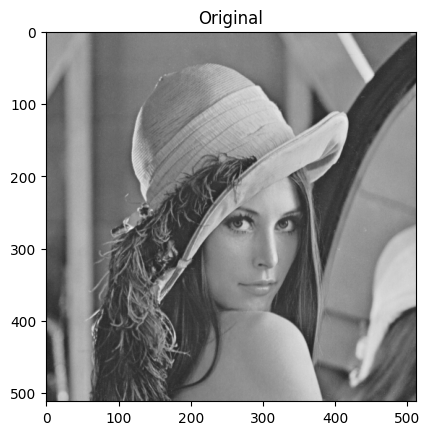

In [83]:
gray = cv2.imread(image)
plt.imshow(gray)
plt.title("Original")
plt.show()

## Basic Thresholding

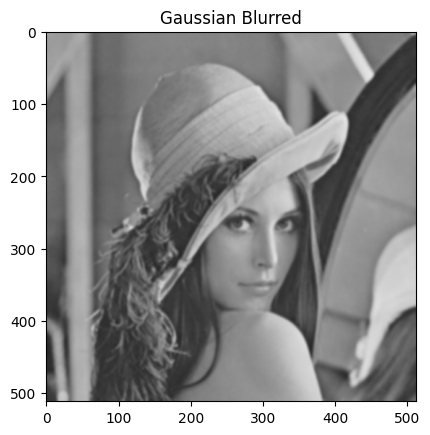

In [74]:
gaussian_blur = 7
blurred = cv2.GaussianBlur(gray, (gaussian_blur, gaussian_blur), 0)
plt.imshow(blurred)
plt.title("Gaussian Blurred")
plt.show()

In [104]:
# apply basic thresholding -- the first parameter is the image
# we want to threshold, the second value is our threshold check
# if a pixel value is greater than our threshold (in this case,
# 200), we set it to be BLACK, otherwise it is WHITE.

import ipywidgets as widgets
from ipywidgets import interact


def update_image(threshold_value):
    # Perform the recalculation based on the kernel size
    # For example, you can perform erosion with the updated kernel size

    gaussian_blur = 7
    gray = cv2.imread(image)
    blurred_image = cv2.GaussianBlur(gray, (gaussian_blur, gaussian_blur), 0)

    # Display the resulting image
    (T, threshInv) = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
    plt.title("Threshold Inverse Binary")
    plt.imshow(threshInv)
    plt.show()

inv_slider = widgets.IntSlider(value=0, min=1, max=255, description='Threshold Value')

interact(update_image, threshold_value=inv_slider)

interactive(children=(IntSlider(value=1, description='Threshold Value', max=255, min=1), Output()), _dom_class…

<function __main__.update_image(threshold_value)>

In [103]:
# using normal thresholding (rather than inverse thresholding),
# we can change the last argument in the function to make the coins
# black rather than white.

import ipywidgets as widgets
from ipywidgets import interact


def update_image(threshold_value):
    # Perform the recalculation based on the kernel size
    # For example, you can perform erosion with the updated kernel size

    gaussian_blur = 7
    gray = cv2.imread(image)
    blurred_image = cv2.GaussianBlur(gray, (gaussian_blur, gaussian_blur), 0)

    # Display the resulting image
    (T, threshInv) = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)
    plt.title("Threshold Binary")
    plt.imshow(threshInv)
    plt.show()

binary_slider = widgets.IntSlider(value=0, min=1, max=255, description='Threshold Value')

interact(update_image, threshold_value=binary_slider)

interactive(children=(IntSlider(value=1, description='Threshold Value', max=255, min=1), Output()), _dom_class…

<function __main__.update_image(threshold_value)>

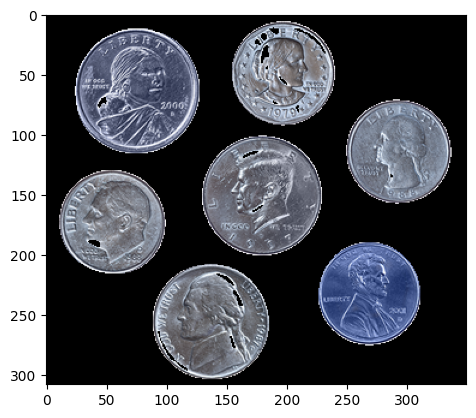

In [132]:
# finally, we can visualize only the masked regions in the image
coins = cv2.imread("./images/coins01.png")
gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
gaussian_blur_kernel_size = 7
blurred = cv2.GaussianBlur(gray, (gaussian_blur_kernel_size, gaussian_blur_kernel_size), 0)
threshold_value = 200
(T, threshInv) = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY_INV)
plt.imshow(cv2.bitwise_and(coins, coins, mask=threshInv))
plt.show()

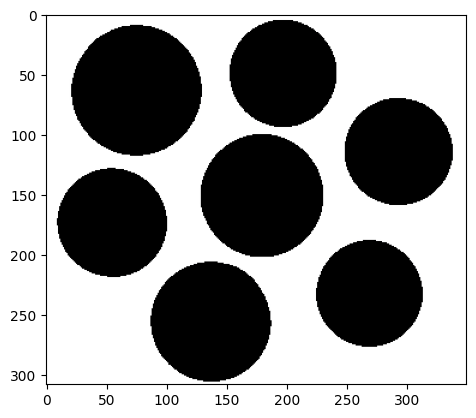

In [139]:
# finally, we can visualize only the masked regions in the image
coins = cv2.imread("./images/coins01.png")
gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
gaussian_blur_kernel_size = 7
blurred = cv2.GaussianBlur(gray, (gaussian_blur_kernel_size, gaussian_blur_kernel_size), 0)
threshold_value = 240
(T, thresh) = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.bitwise_and(coins, coins, mask=thresh))
plt.show()

## Otsu's method

Otsu’s method assumes a bi-modal distribution of the grayscale pixel intensities of our input image. If this is not the case, then Otsu’s method can return sub-par results.

Secondly, Otsu’s method is a global thresholding method. In situations where lighting conditions are semi-stable and the objects we want to segment have sufficient contrast from the background, we might be able to get away with Otsu’s method.

Otsu's thresholding value: 180.0


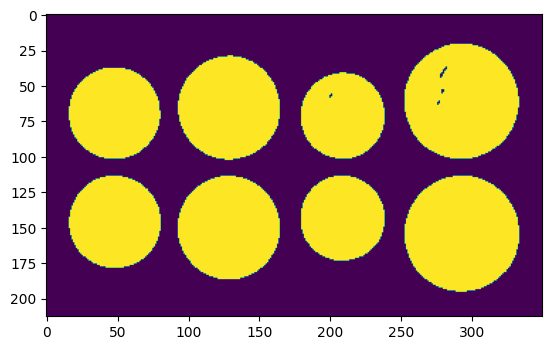

In [141]:
coins = cv2.imread("./images/coins02.png")
gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(threshInv)
print("Otsu's thresholding value: {}".format(T))
plt.show()

## Adaptive thresholding

Use multiple thresholds however choosing the size of the pixel neighborhood for local thresholding is absolutely crucial.

Otsu's thresholding value: 105.0


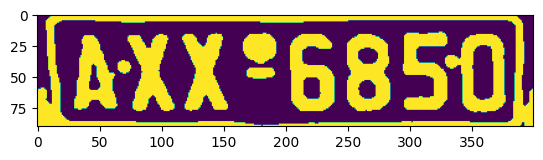

In [145]:
license_plate = cv2.imread("./images/license_plate.png")
gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(threshInv)
print("Otsu's thresholding value: {}".format(T))
plt.show()

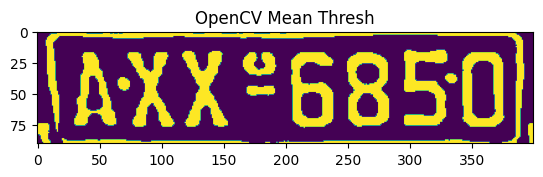

In [147]:
# import the necessary packages
from skimage.filters import threshold_local
license_plate = cv2.imread("./images/license_plate.png")
image = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# instead of manually specifying the threshold value, we can use adaptive
# thresholding to examine neighborhoods of pixels and adaptively threshold
# each neighborhood -- in this example, we'll calculate the mean value
# of the neighborhood area of 25 pixels and threshold based on that value;
# finally, our constant C is subtracted from the mean calculation (in this
# case 15)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
plt.title("OpenCV Mean Thresh")
plt.imshow(thresh)
plt.show()


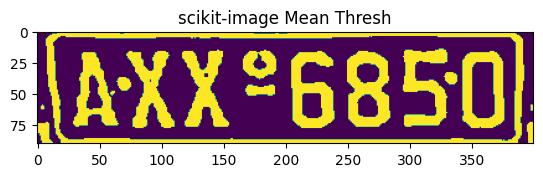

In [148]:
# personally, I prefer the scikit-image adaptive thresholding, it just
# feels a lot more "Pythonic"
T = threshold_local(blurred, 29, offset=5, method="gaussian")
thresh = (blurred < T).astype("uint8") * 255
plt.title("scikit-image Mean Thresh")
plt.imshow(thresh)
plt.show()